In [1]:
import joblib
from tensorflow import keras
import numpy as np
import cv2
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

def load_digit(digit):
    digit = cv2.resize(digit,(28,28))
    plt.imshow(digit,cmap='gray')
    plt.show()
    # digit =  digit.flatten()
    digit = np.expand_dims(digit,axis=0)
    digit = digit/ 255.0
    return digit

def load_model():
    model = keras.models.load_model("digit_rec_3.h5")
    return model

def imshow(img):
    plt.imshow(img,cmap='gray')
    
        
def img(img = "images/sudoku.png"):
    img = cv2.imread(img)
    return img
model = load_model()


In [2]:
def find_big_contour(contours):
    biggest_cntr = contours[0]
    bigt_area =50
    for i in contours:
        area = cv2.contourArea(i)
        if area > bigt_area :
            bigt_area = area
            biggest_cntr = i
            
    return biggest_cntr

In [3]:
def reorder_points(points):
    new_points = np.zeros((4,1,2))
    points = points.reshape(-1,2)
    new_points[0] = points[np.argmin(np.sum(points,axis=1))]
    new_points[3] = points[np.argmax(np.sum(points,axis=1))]
    new_points[1] = points[np.argmin(np.diff(points,axis=1))]
    new_points[2] = points[np.argmax(np.diff(points,axis=1))]
    return new_points

In [15]:
sudoku_img = img(img='images\sudoku_2.jpg')
gray = cv2.cvtColor(sudoku_img,cv2.COLOR_BGR2GRAY)
# blur = cv2.blur(gray,(3,3))
thresh = cv2.adaptiveThreshold(gray,255,1,1,11,2)
# thresh = cv2.threshold(blur,cv2.THRESH_BINARY,25,255)
# thresh = cv2.bitwise_not(thresh)
contours,h = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
biggest_cntr = find_big_contour(contours)
points = reorder_points(biggest_cntr)
pts1 = np.float32(points)
pts2 = np.float32([[0,0],[450,0],[0,450],[450,450]])
matrix = cv2.getPerspectiveTransform(pts1,pts2)
warped_img = cv2.warpPerspective(thresh,matrix,(450,450))

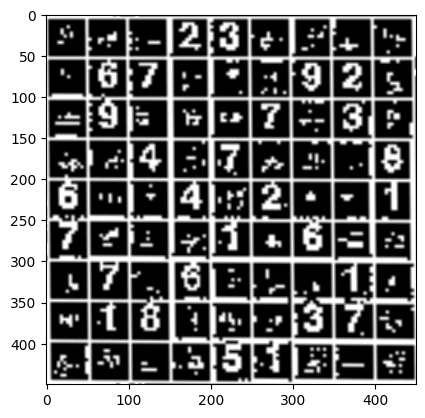

In [16]:
plt.imshow(warped_img,cmap='gray')

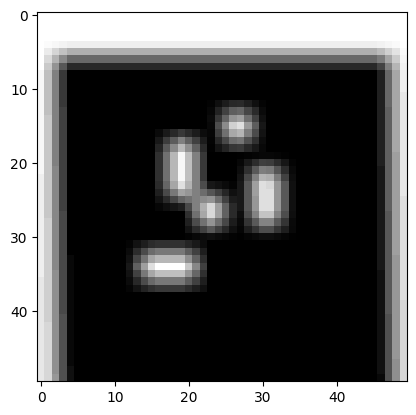

0


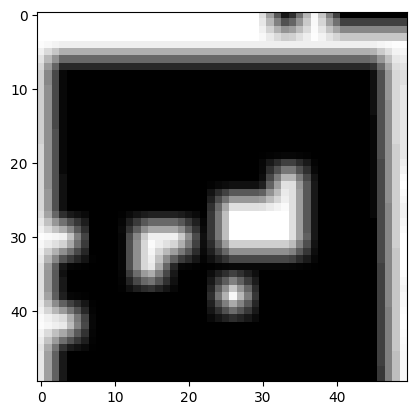

0


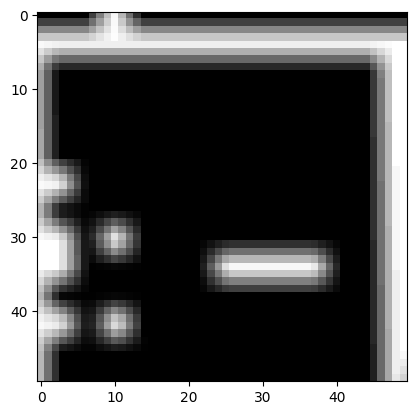

0


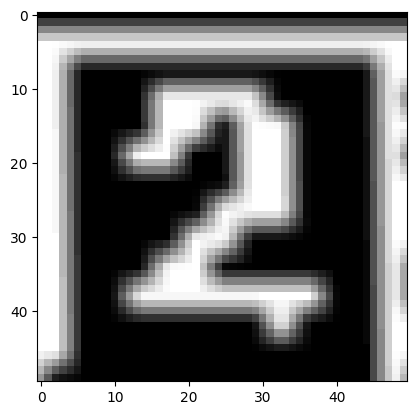

8


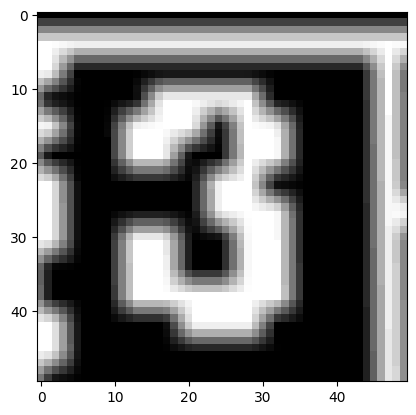

8


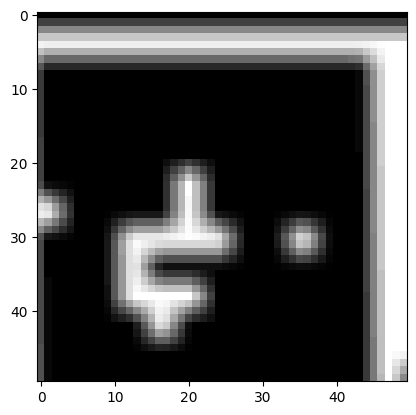

0


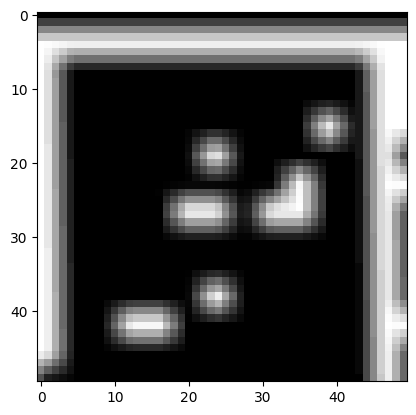

0


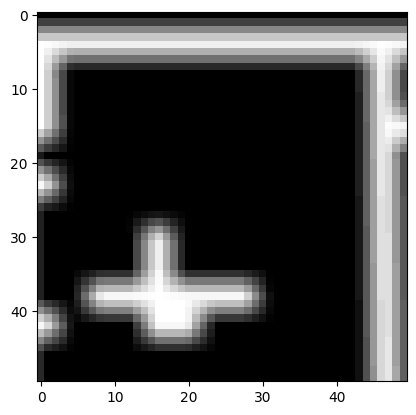

0


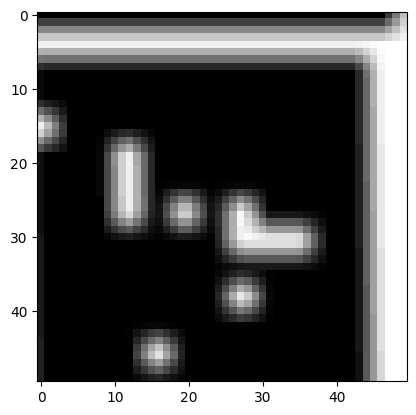

0


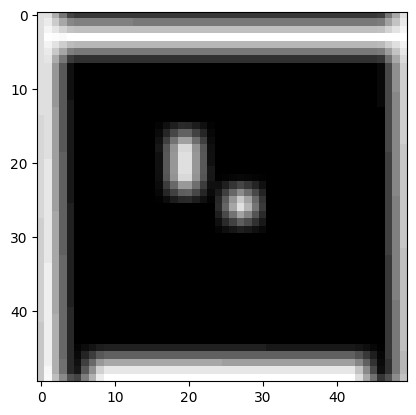

0


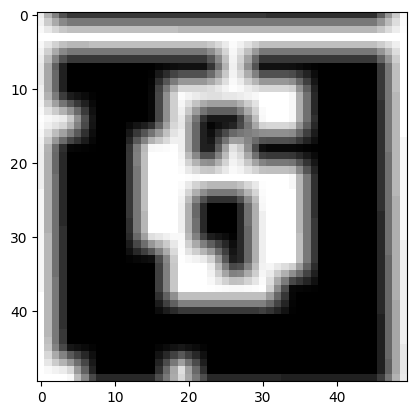

8


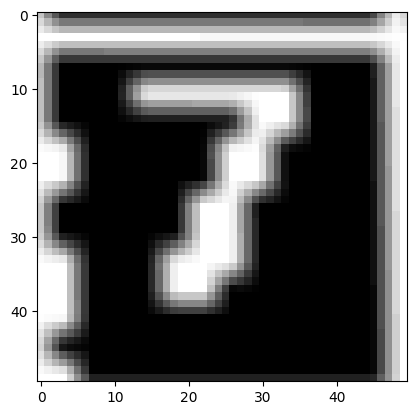

7


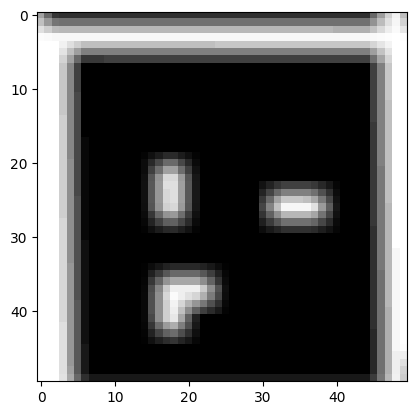

0


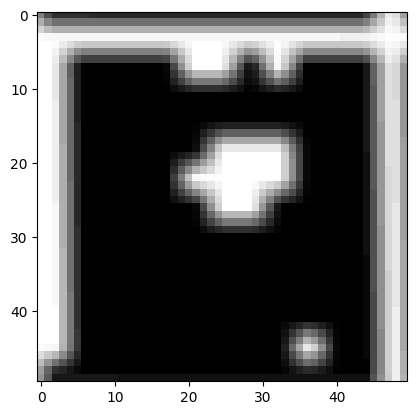

3


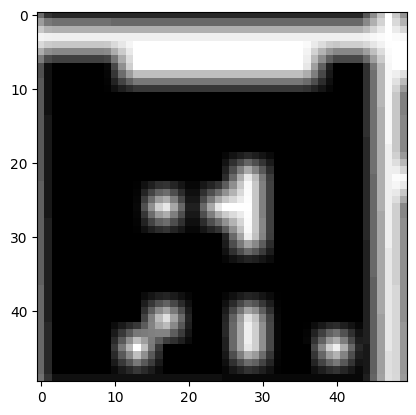

3


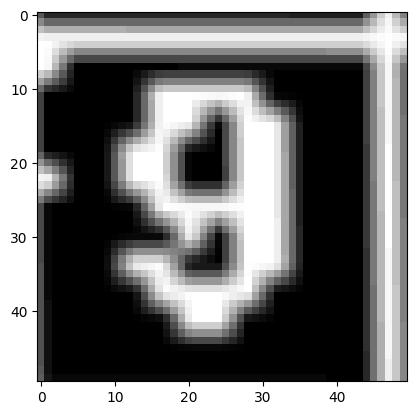

8


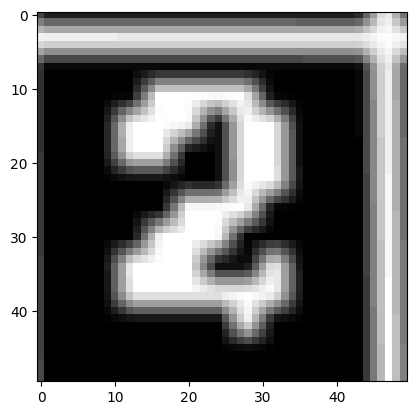

8


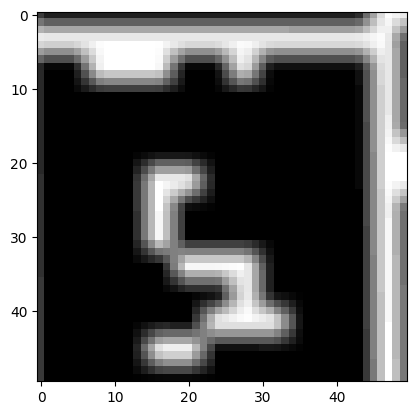

8


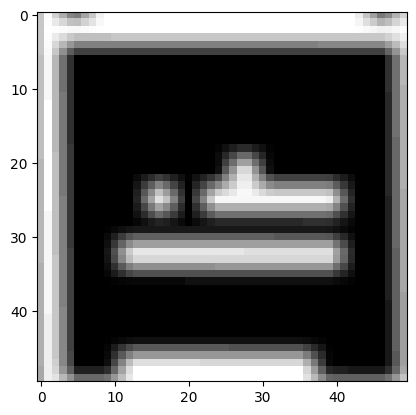

0


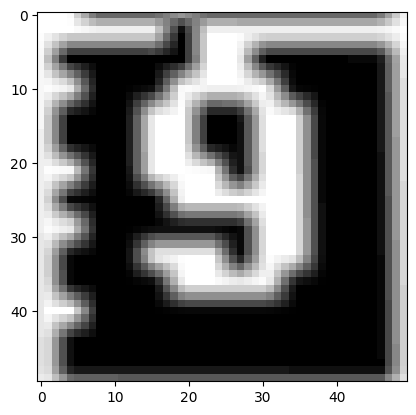

8


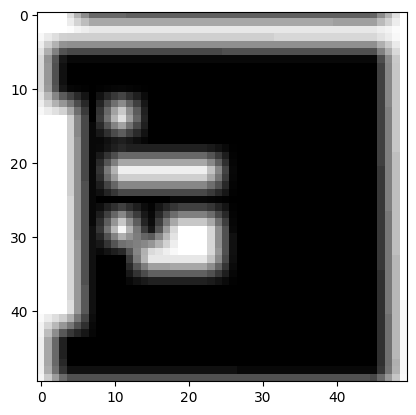

0


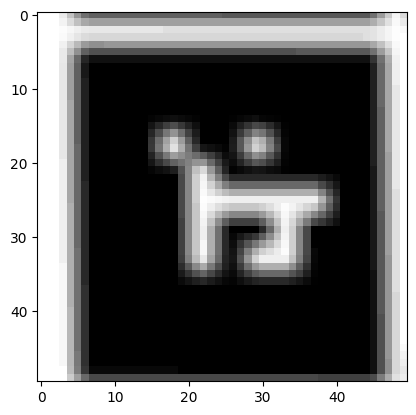

8


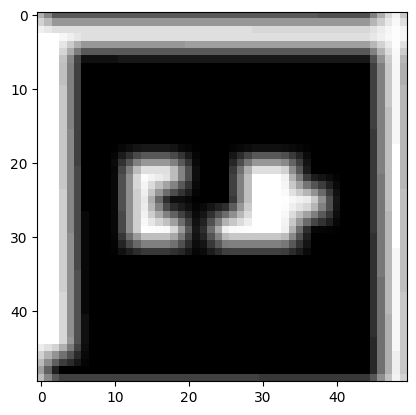

0


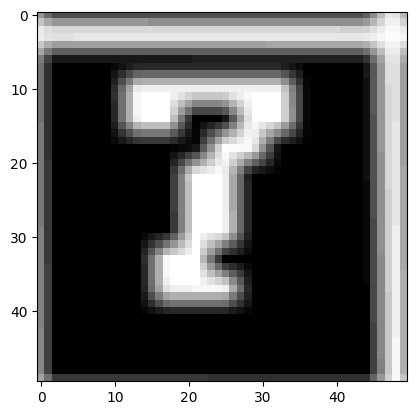

8


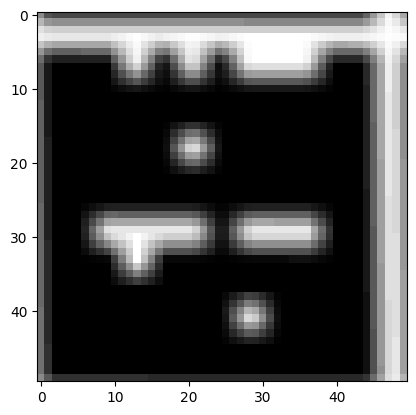

0


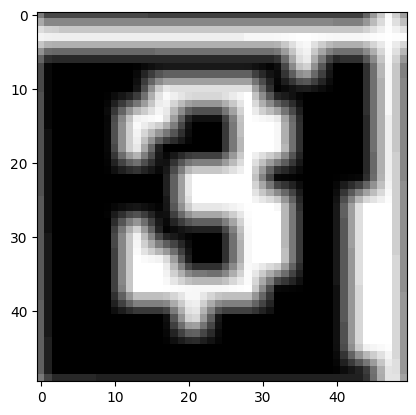

8


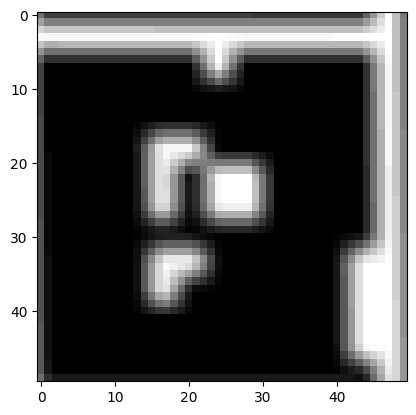

8


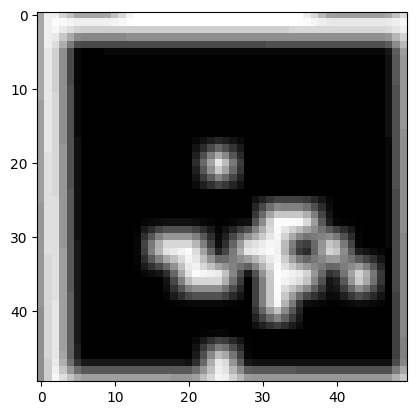

8


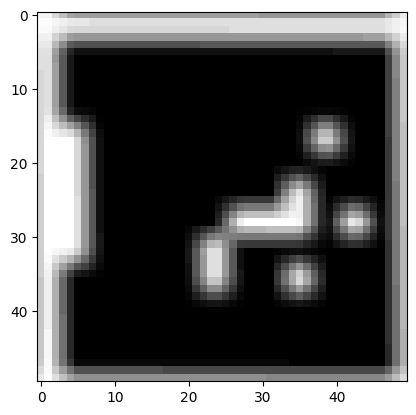

0


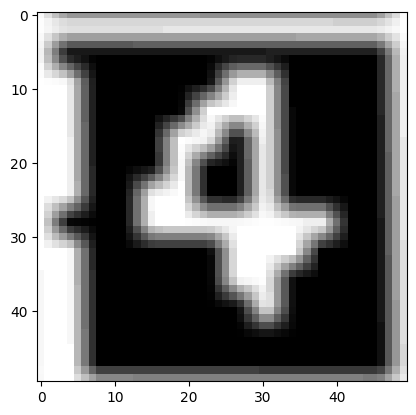

4


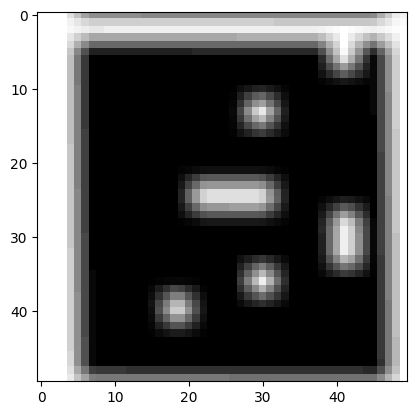

0


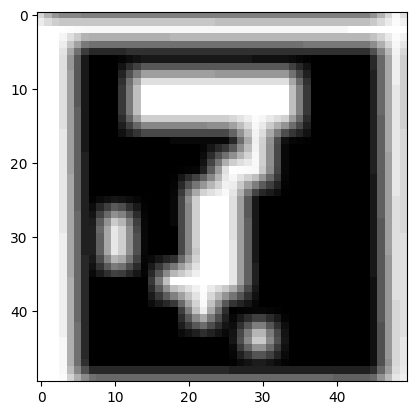

8


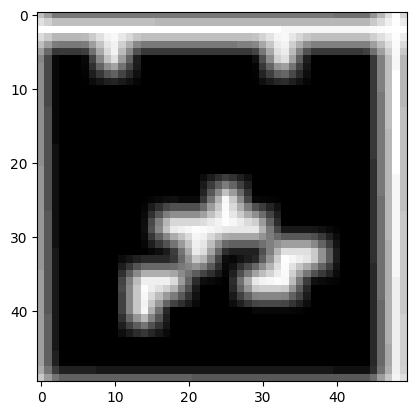

0


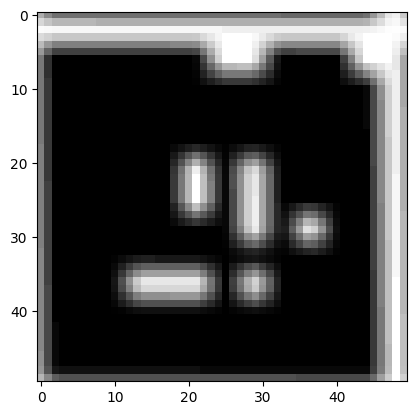

0


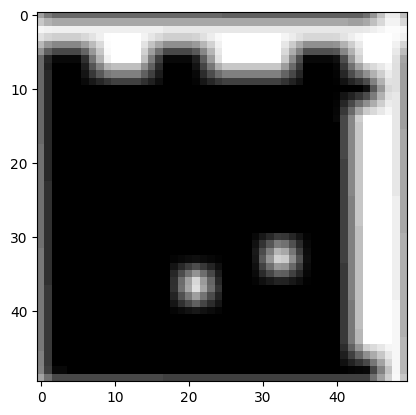

0


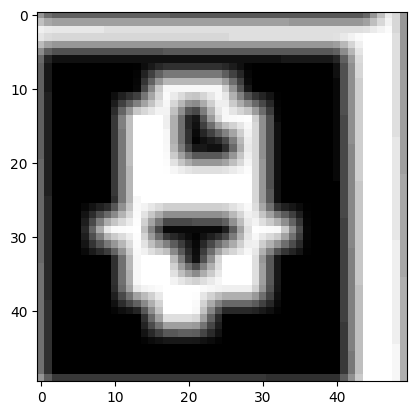

8


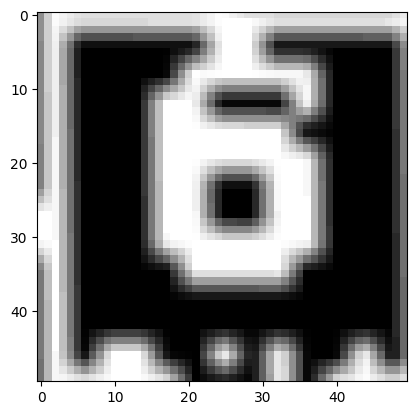

8


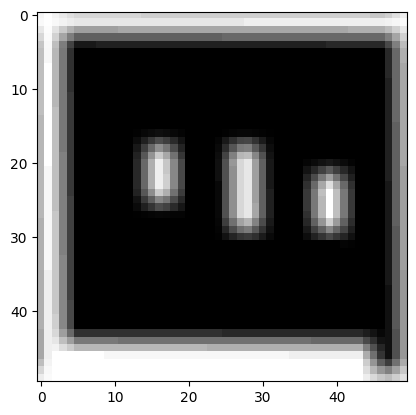

0


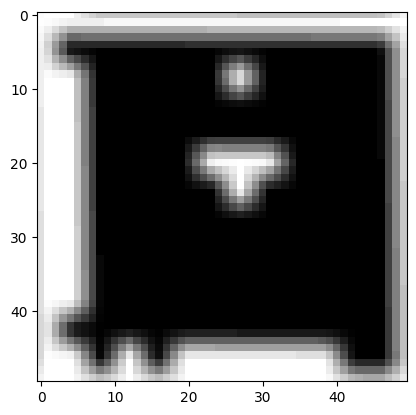

0


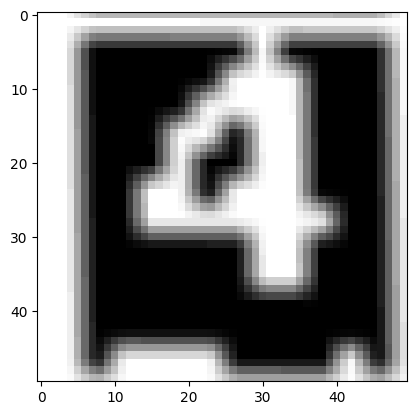

8


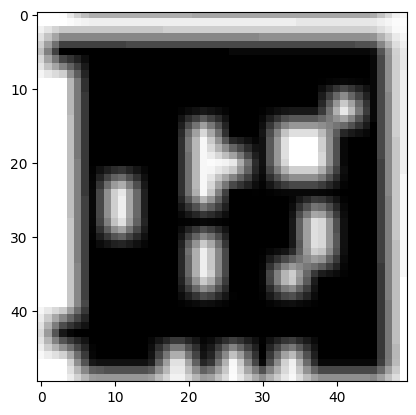

0


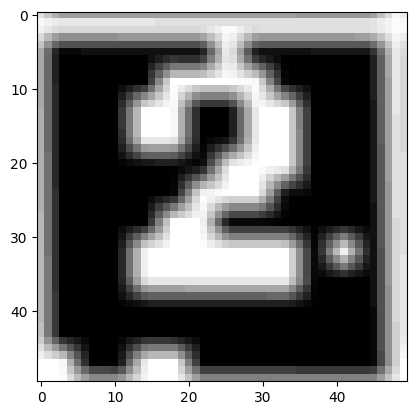

8


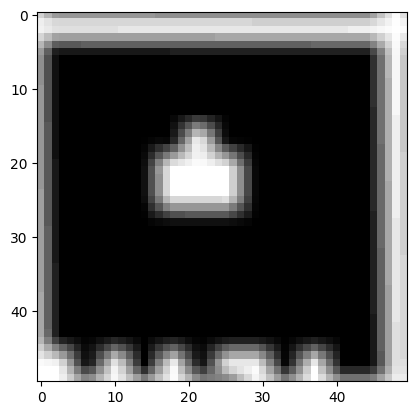

0


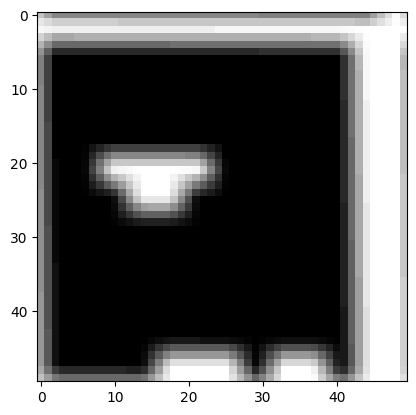

0


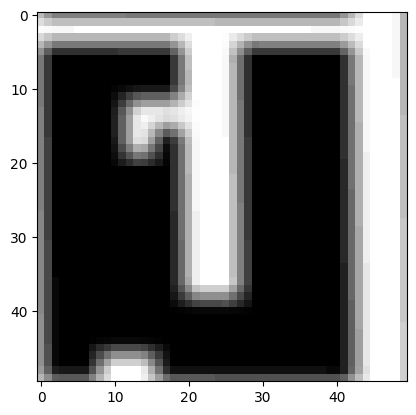

8


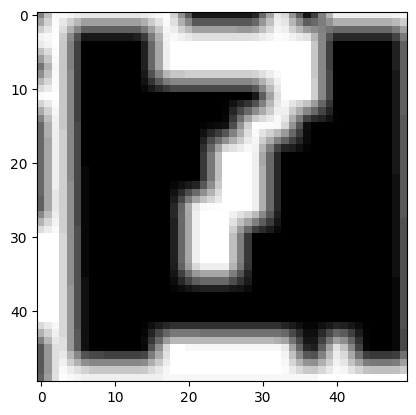

3


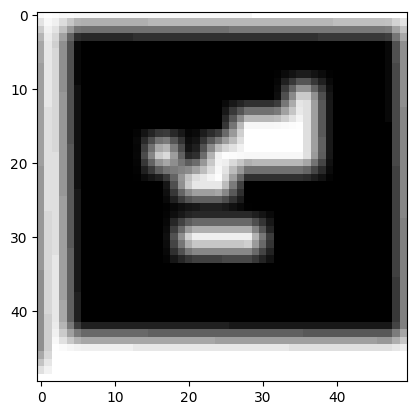

8


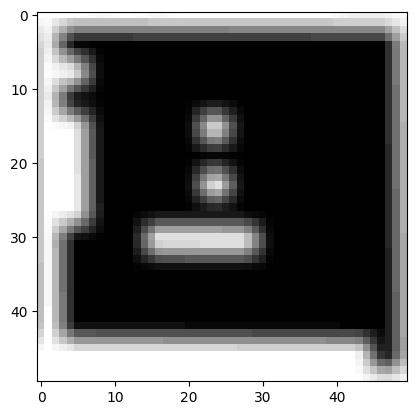

0


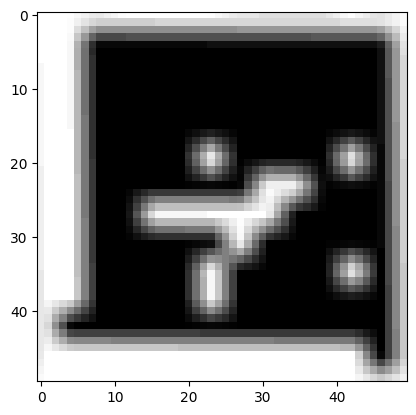

8


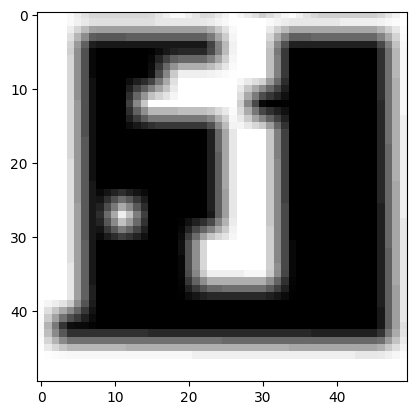

8


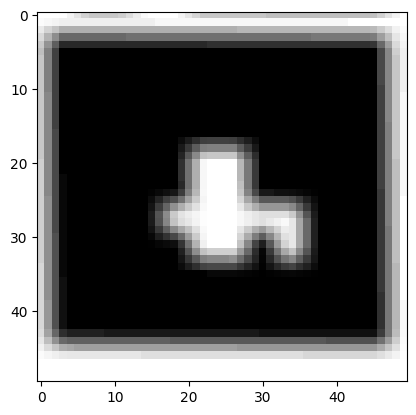

0


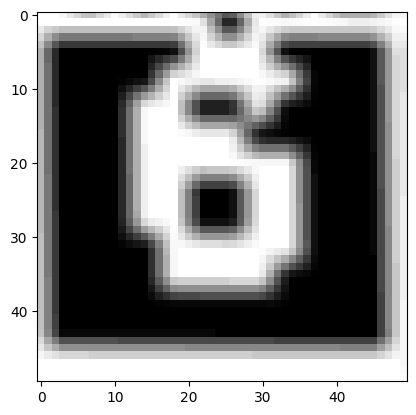

8


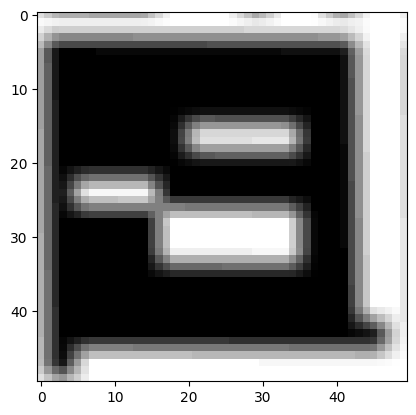

8


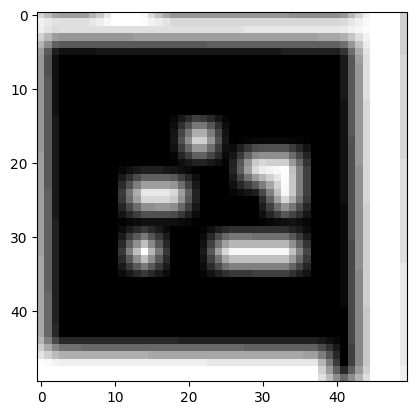

0


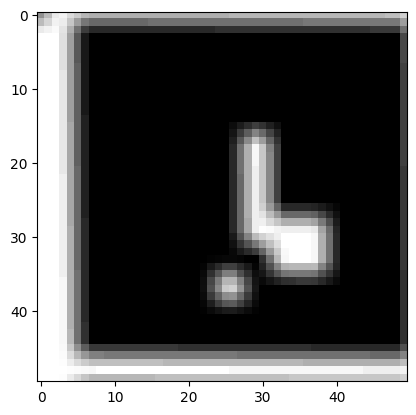

0


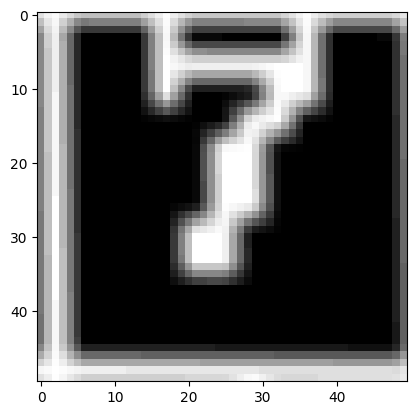

8


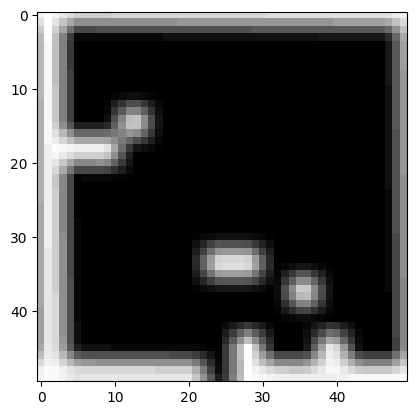

0


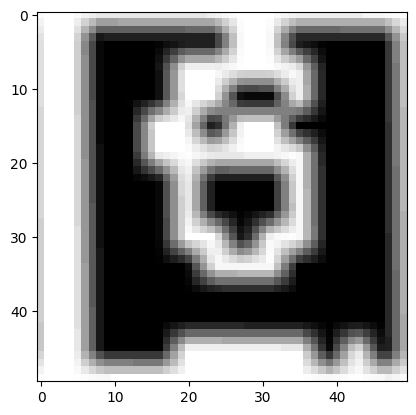

8


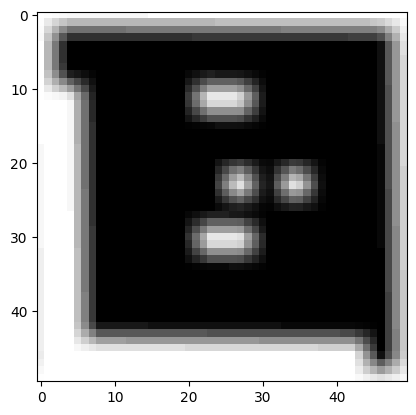

0


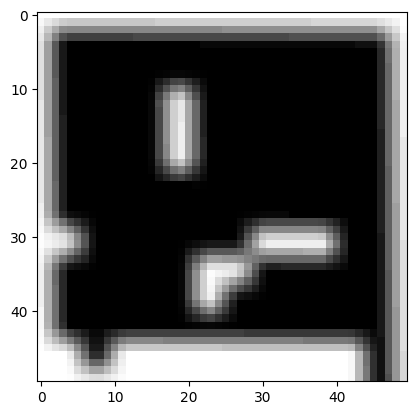

0


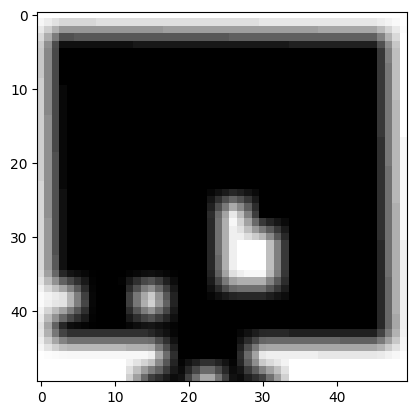

0


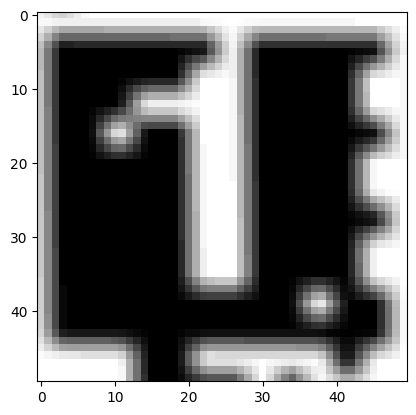

8


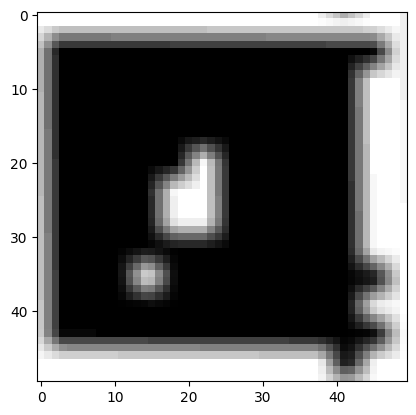

0


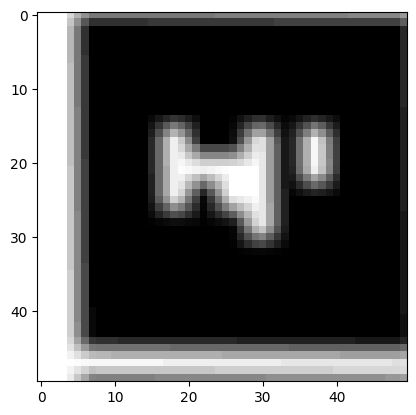

8


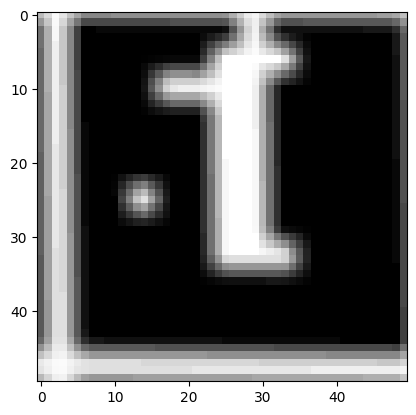

8


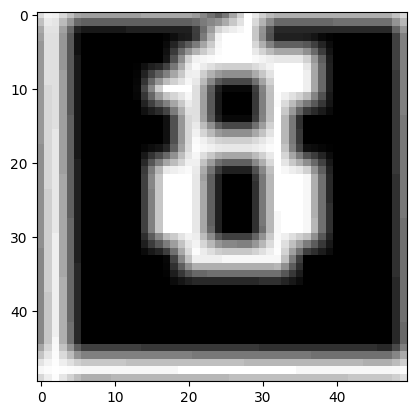

8


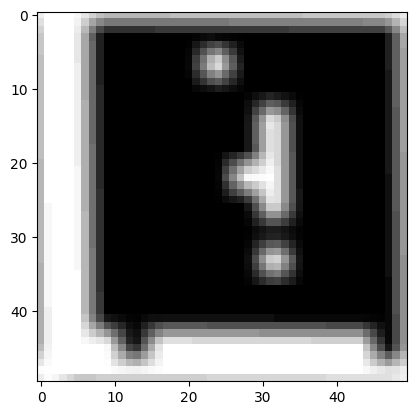

0


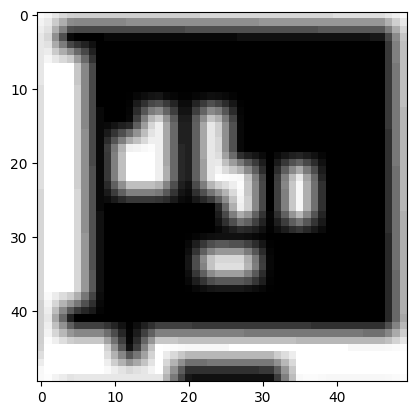

8


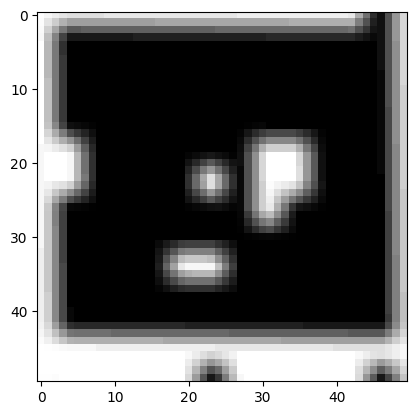

0


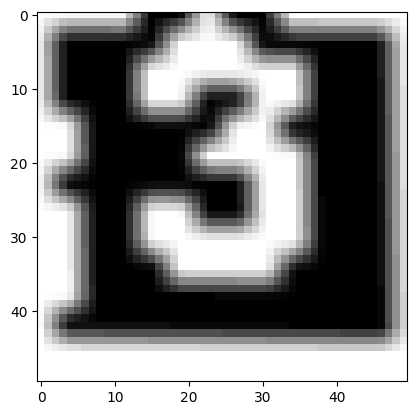

8


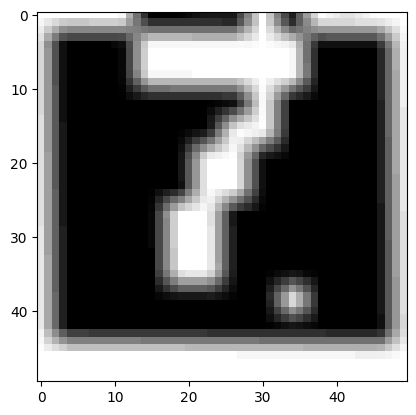

8


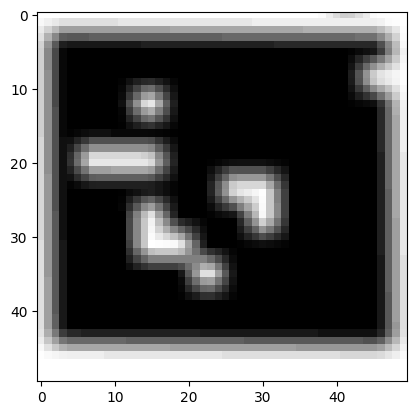

0


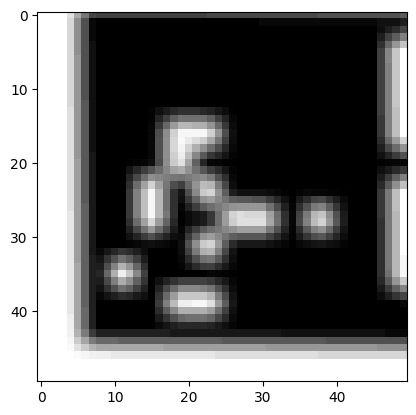

8


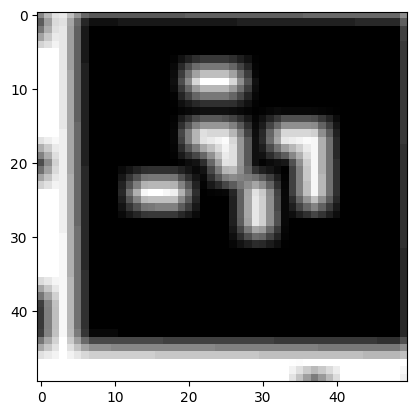

8


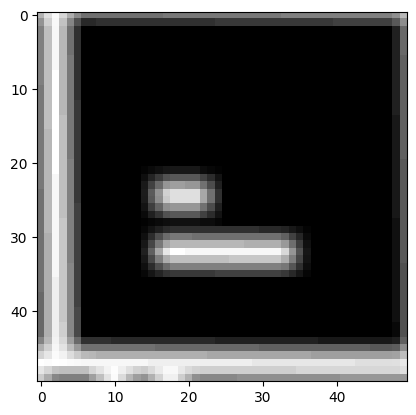

0


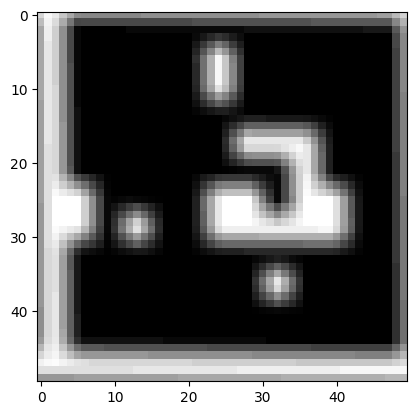

0


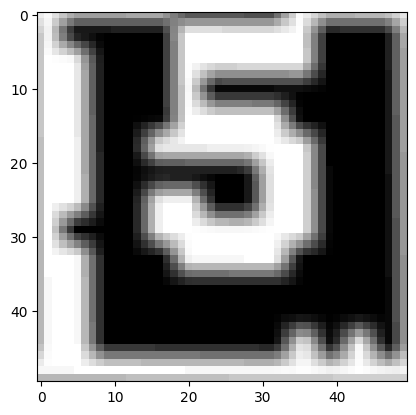

8


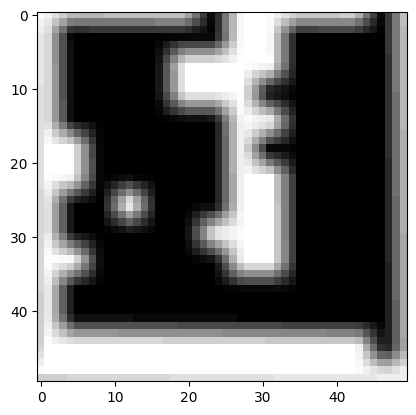

8


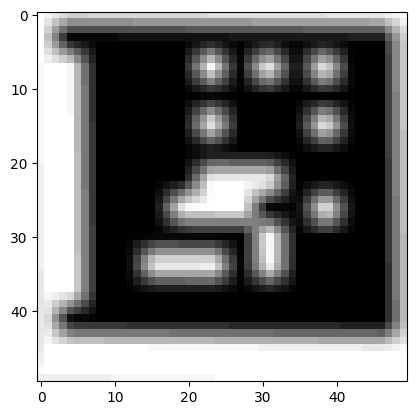

8


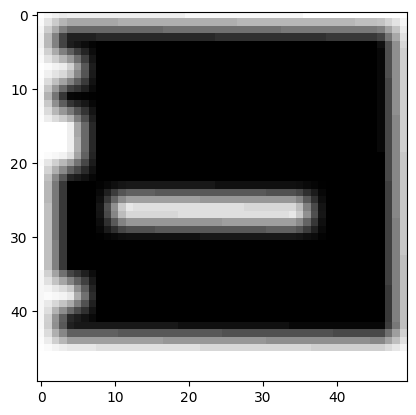

0


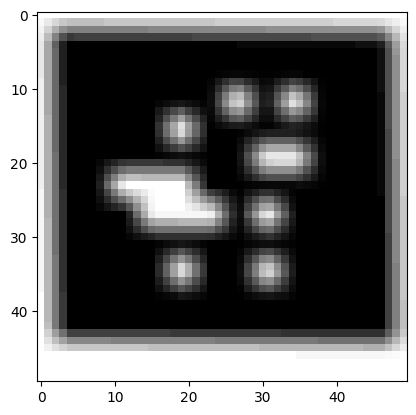

8


In [17]:
blocks = []
i = 0
for row in np.vsplit(warped_img,9):
    for col in np.hsplit(row,9):
    #     cv2.imwrite(f'blocks/{i}.jpg',col)
    #     i+=1
    # #     imshow(col)
    # #     break
    # # break
        plt.imshow(col,cmap='gray')
        plt.show()
        col = cv2.cvtColor(col,cv2.COLOR_GRAY2BGR)
        col = cv2.resize(col,(28,28))
        col = np.expand_dims(col,0)
        print(np.argmax(model(col)))
        # break
        

In [48]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [49]:
train_datagen = ImageDataGenerator(rescale=1./255)
training_set = train_datagen.flow_from_directory('num_dataset',target_size=(28,28),batch_size=32,class_mode='categorical')

Found 340 images belonging to 10 classes.


In [8]:
model = load_model()

In [13]:
im = col.copy()
im.shape

(50, 50)

In [14]:
im = cv2.resize(im,(28,28))

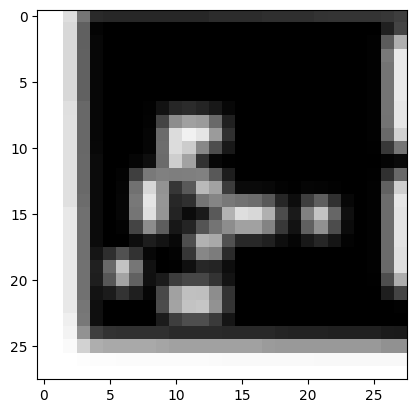

In [16]:
plt.imshow(im,cmap='gray')

In [17]:
im = np.expand_dims(im,0)

In [19]:
np.argmax(model(im))

2

In [23]:
col.shape

(1, 50, 50)